In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [160]:
def draw_factorPlot(dataframe, ycol='somecolumn', xcol='somecolumn', kinda='bar', rotate=60, ylabel='somelabel'):
    sns.set(style="darkgrid")

    g = sns.catplot(data=dataframe,y=ycol, x=xcol, height=12, kind=kinda, palette="pastel", ci=95);
    # g.despine(left=True)
    g.set_xticklabels(rotation=rotate)
    g.set_ylabels(ylabel)
    g.set_xlabels("Volume")

In [128]:
avocados = pd.read_csv('avocado.csv', index_col=1) # The index is Date.  Add ,index_col=1 for making the date an index.
avocados = avocados.loc[:, ~avocados.columns.str.contains('^Unnamed')] # Removed the unnamed fistcolumn.

In [129]:
# avocados.columns
avocados.index.values

array(['2015-12-27', '2015-12-20', '2015-12-13', ..., '2018-01-21',
       '2018-01-14', '2018-01-07'], dtype=object)

In [130]:
avocados.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [181]:
#Let's set the context to avocados in San Diego in 2016
avocados_sd_2016 = avocados[(avocados['year'] == 2016) & (avocados['region'] == 'SanDiego')]
avocados_2016 = avocados[(avocados['year'] == 2016)]

In [78]:
# part I - setup the data to plot 4 different ways 
avocados_sd_sample = avocados_sd_2016.sample(30)
avocados_sd_sample = avocados_sd_sample.sort_values(by='Date', ascending=True)

In [79]:
#global variables
rotation_angle = 45

In [80]:
avocados_sd_sample.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [81]:
avocados.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [82]:
avocados_sd_sample.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.253667,259673.712000,85601.858333,78681.43500,10184.691000,85205.727667,74255.139667,10579.791333,370.796667,2016.0
std,0.347181,272330.078686,95078.519907,77379.86906,11794.742888,92148.203568,81347.906682,12856.845127,596.849382,0.0
min,0.780000,10499.710000,829.170000,5916.03000,0.000000,1673.310000,403.330000,0.000000,0.000000,2016.0
25%,0.995000,17214.337500,1634.982500,9466.46750,0.000000,5663.680000,2628.667500,284.632500,0.000000,2016.0
50%,1.215000,23099.880000,2829.605000,12515.08000,28.635000,10862.090000,10824.795000,4663.365000,0.000000,2016.0
75%,1.470000,556346.157500,178765.117500,147561.81000,20688.800000,186856.105000,159908.210000,17959.870000,643.750000,2016.0
max,2.220000,661159.790000,242212.630000,205497.08000,31852.410000,223820.630000,199325.340000,50311.130000,2101.870000,2016.0


In [83]:
avocados_sd_2016.head(20)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2016-12-25,0.89,473730.19,118030.19,191754.65,14438.25,149507.10,125660.66,22080.88,1765.56,conventional,2016,SanDiego
2016-12-18,0.90,437170.79,106000.40,161104.63,14145.04,155920.72,115858.84,38951.60,1110.28,conventional,2016,SanDiego
2016-12-11,0.81,505122.60,139066.79,205742.62,14736.56,145576.63,91917.03,53237.93,421.67,conventional,2016,SanDiego
2016-12-04,0.85,499144.04,214063.09,133318.88,15081.42,136680.65,128681.56,6275.12,1723.97,conventional,2016,SanDiego
2016-11-27,1.08,392291.47,160595.93,108871.80,12510.47,110313.27,98751.41,10626.32,935.54,conventional,2016,SanDiego
2016-11-20,1.25,369682.40,135337.58,120005.93,14499.34,99839.55,85261.69,14192.86,385.00,conventional,2016,SanDiego
2016-11-13,1.37,353828.79,120524.26,126173.10,18445.16,88686.27,74992.87,13258.40,435.00,conventional,2016,SanDiego
2016-11-06,1.68,292299.52,89364.77,128356.68,18569.63,56008.44,46336.06,8804.32,868.06,conventional,2016,SanDiego
2016-10-30,1.65,270941.97,88975.06,119080.04,14742.36,48144.51,41712.24,6337.00,95.27,conventional,2016,SanDiego


## Assignment:  Plot the variable 4 different ways

1.  Choose one variable and plot that variable four different ways, A, B, C, D.
2.  Choose two continuous variables, and plot them three different ways, A, B, C.
3.  Choose one continuous variable and one categorical variable, and plot them six different ways, A, B, C, D, E, F.

### Section 1

In [ ]:
x=avocados_sd_2016['AveragePrice']

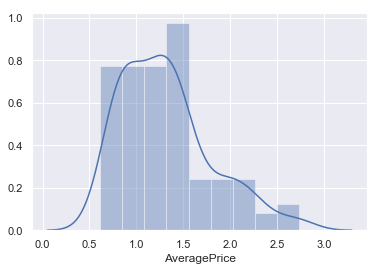

In [93]:
# This is a one dimensional plot for the Average Price of Avocados in San Diego
# 1a -> distplot

sns.distplot(x)

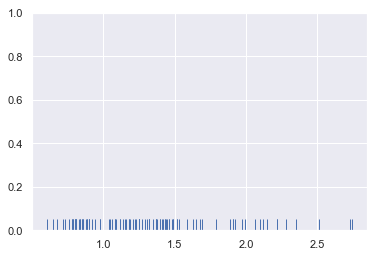

In [98]:
# 1b -> rugplot
sns.rugplot(x)

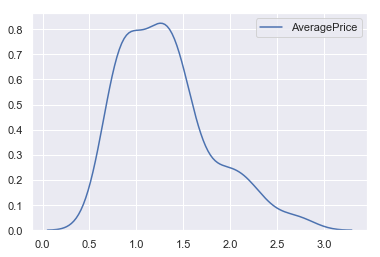

In [101]:
# 1c -> kdeplot
sns.kdeplot(x)

In [85]:
head_value = 1000
# print(avocados_sd_2016['AveragePrice'].head(head_value), avocados_sd_2016['Total Volume'].head(head_value))

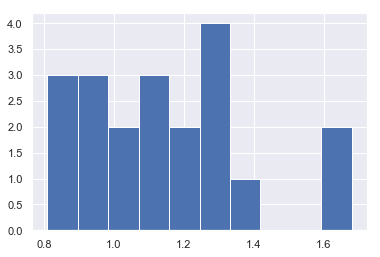

In [87]:
# 1d -> historgram
plt.hist(avocados_sd_2016['AveragePrice'].head(n=20))
plt.show()

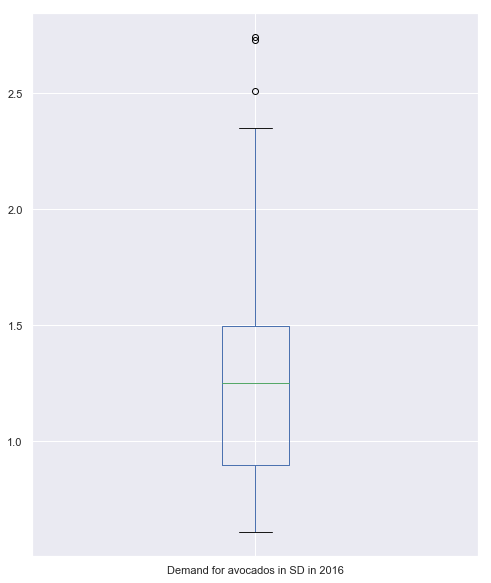

In [88]:
# 1e -> distplot
avocados_sd_2016.plot(y='AveragePrice', kind='box', label='Demand for avocados in SD in 2016', figsize=(8,10));

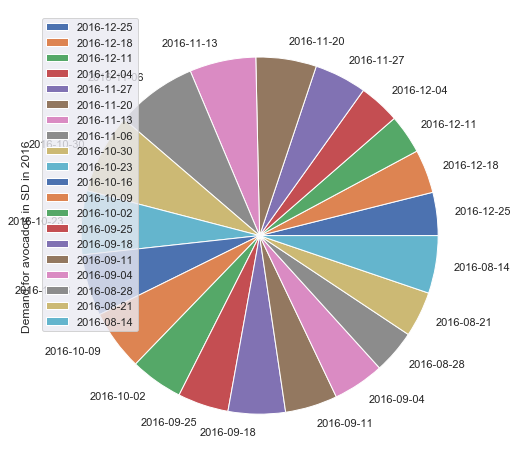

In [89]:
# 1f -> pieplot
avocados_sd_2016.head(n=20).plot(y='AveragePrice', kind='pie', label='Demand for avocados in SD in 2016', figsize=(8,10));

### Section 2

Choose two continuous variables and plot them three different ways.

/Users/lou/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


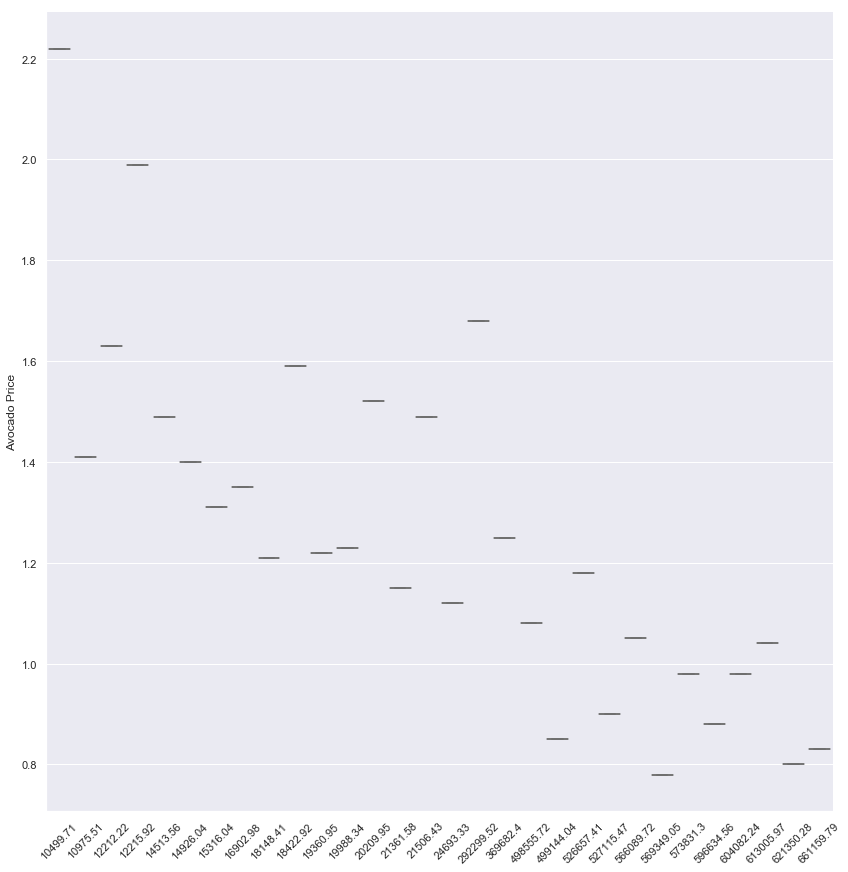

In [108]:
# 2-A
sns.set(style="darkgrid")

g = sns.factorplot( data=avocados_sd_sample,y='AveragePrice',  x='Total Volume',
                   height=12, kind="box", palette="pastel", ci=95);
# g.despine(left=True)
g.set_xticklabels(rotation=rotation_angle)
g.set_ylabels("Avocado Price")
g.set_xlabels("")

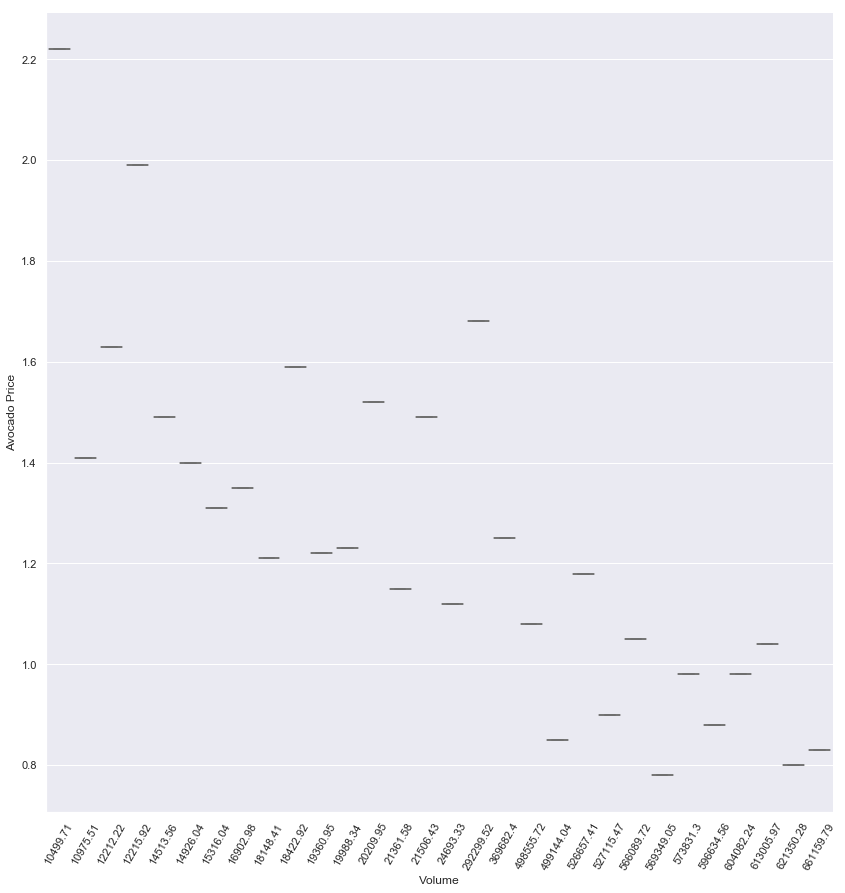

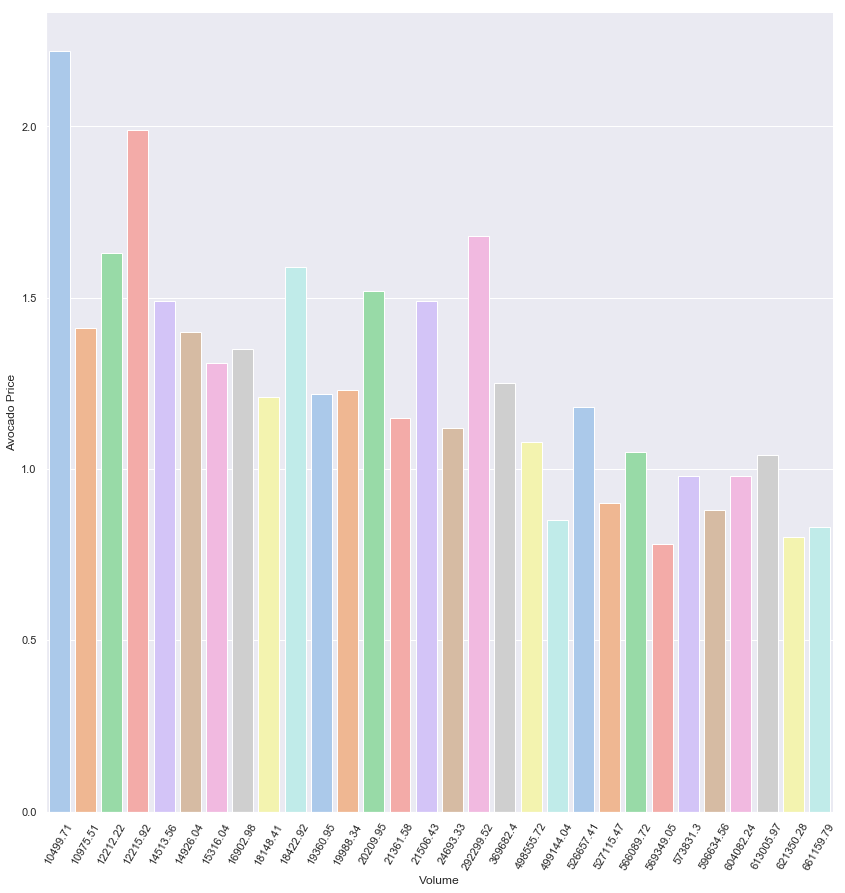

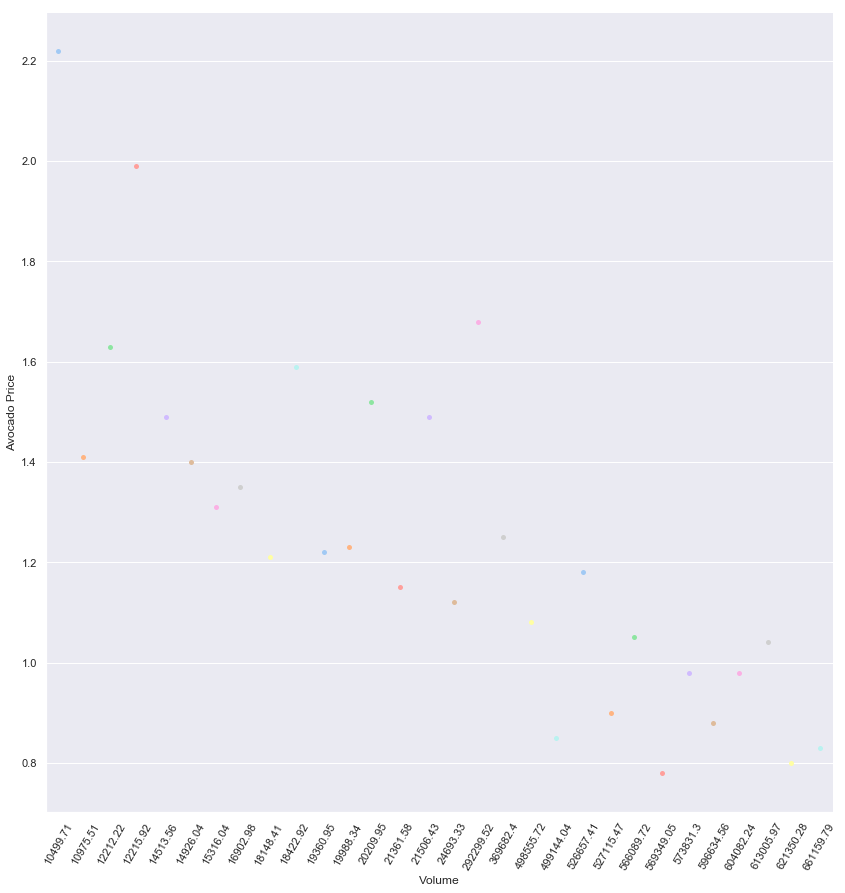

In [161]:
factor_plots = ['box', 'bar', 'strip']
for catplot in factor_plots:
    draw_factorPlot(avocados_sd_sample, ycol='AveragePrice', xcol='Total Volume', kinda=catplot, ylabel="Avocado Price", rotate=60);

In [ ]:
# 2-B
# seaborn bar plot
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.catplot(y="AveragePrice",  x='Date', data=avocados_sd_2016,
                   height=16, kind="point", palette="pastel", ci=95)
g.despine(left=True)
g.set_xticklabels(rotation=rotation_angle)
g.set_ylabels("Avocado Price")
g.set_xlabels("")
plt.title('Barplot: San Diego Avocado Prices')
plt.show()

In [ ]:
# 2-C
# seaborn bar plot
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x='Date', y="AveragePrice", data=avocados_sd_2016,
                   fit_reg=False,
                   scatter_kws={'alpha':0.4},
                   height=16)
g.set_xticklabels(rotation=rotation_angle)
g.set_ylabels("Avocado Price")
g.set_xlabels("")
plt.title('Barplot: San Diego Avocado Prices')
plt.show()

### Section 3

In [ ]:
# seaborn bar plot
# Setting the overall aesthetic.
sns.set(style="darkgrid")

g = sns.factorplot(x='Total Bags', y="AveragePrice", data=avocados_sd_2016,
                   fit_reg=False,
                   scatter_kws={'alpha':0.4},
                   height=16)
g.set_xticklabels(rotation=rotation_angle)
g.set_ylabels("Avocado Price")
g.set_xlabels("Bag Pounds")
plt.title('Scatter Plot: Demand for Avocados in San Diego')
plt.show()

In [230]:
# Grouping by region groupings
grouping_columns = ['region', 'AveragePrice', 'Total Volume']
sort_by_aggregate = ['mean']
avocados_group_by_region = avocados.groupby(grouping_columns[0])[grouping_columns].agg(sort_by_aggregate)

In [234]:
avocados_group_by_region.head(10)

,AveragePrice,Total Volume
,mean,mean
region,,
Albany,1.561036,4.753787e+04
Atlanta,1.337959,2.621453e+05
BaltimoreWashington,1.534231,3.985619e+05
Boise,1.348136,4.264257e+04
Boston,1.530888,2.877929e+05
BuffaloRochester,1.516834,6.793630e+04
California,1.395325,3.044324e+06
Charlotte,1.606036,1.051939e+05


In [242]:
# 3.a -> A Seaborn Scatterplot
# sns.jointplot(x=avocados_group_by_region.index[0], y='Total Volume', data=avocados_group_by_region)
sns.jointplot(y=avocados_group_by_region.index[1,1], x=avocados_group_by_region['Total Volume'])
# avocados_group_by_region.columns

IndexError: too many indices for array

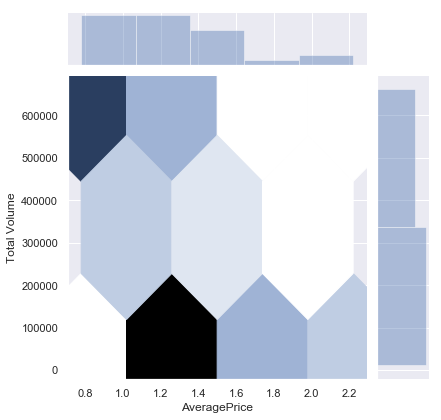

In [165]:
# 3.b -> A Seaborn Hexbin plot
sns.jointplot(x='AveragePrice', y='Total Volume', kind='hex' ,data=avocados_sd_sample)

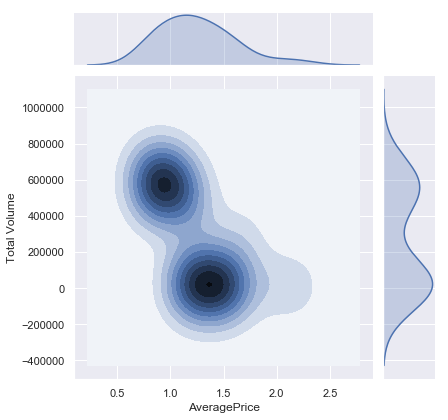

In [166]:
# 3.c -> A Seaborn Hexbin plot
sns.jointplot(x='AveragePrice', y='Total Volume', kind='kde' ,data=avocados_sd_sample)

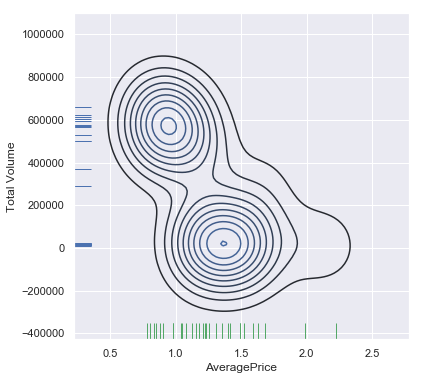

In [169]:
# 3.d -> A 2 dimensional kernel density plot with kdeplot 
f, ax = plt.subplots(figsize=(6,6))
sns.kdeplot(avocados_sd_sample.AveragePrice, avocados_sd_sample['Total Volume'], ax=ax)
sns.rugplot(avocados_sd_sample.AveragePrice, color="g", ax=ax)
sns.rugplot(avocados_sd_sample['Total Volume'], vertical=True, ax=ax)

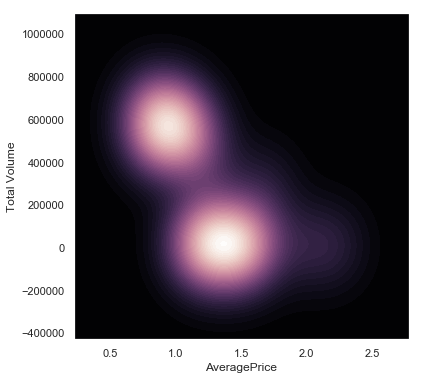

In [171]:
# 3.e -> A 2 dimensional kernel density plot with kdeplot 
f, ax = plt.subplots(figsize=(6,6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(avocados_sd_sample.AveragePrice, avocados_sd_sample['Total Volume'], cmap=cmap, n_levels=60, shade=True)

In [ ]:
# 3.f -> A jointgrid plot
g = sns.jointplot()

Choose two continuous variables, and plot them three different ways.

Available columns:
Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'.

In [ ]:
avocados_sd_sample.plot(y='AveragePrice', kind='bar', label='Demand for avocados in SD in 2016', figsize=(8,10));

In [ ]:
# avocados_sd_sample.plot(y='AveragePrice', kind='scatter', label='Demand for avocados in SD in 2016', figsize=(8,10));
plt.scatter(y=avocados_sd_2016['AveragePrice'], x=avocados_sd_2016['year'])

In [ ]:
# avocados.columns
# Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
#        '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
#        'year', 'region'],
#       dtype='object')

In [200]:
avocados_2016.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [216]:
# Grouping by region groupings
grouping_columns = ['region', 'AveragePrice', 'Total Volume']
sort_by_aggregate = ['mean']

# df_usertype_grouped = df.groupby(grouping_columns)['usertype'].agg(['count'])
# df_usertype_grouped = df_usertype_grouped.sort_values(by=sort_by_aggregate, ascending=False)

avocados_group_by_region = avocados.groupby(grouping_columns[0])[grouping_columns].agg(sort_by_aggregate)
avocados.reset_index()
avocados_group_by_region.describe

<bound method NDFrame.describe of                     AveragePrice  Total Volume
                            mean          mean
region                                        
Albany                  1.561036  4.753787e+04
Atlanta                 1.337959  2.621453e+05
BaltimoreWashington     1.534231  3.985619e+05
Boise                   1.348136  4.264257e+04
Boston                  1.530888  2.877929e+05
BuffaloRochester        1.516834  6.793630e+04
California              1.395325  3.044324e+06
Charlotte               1.606036  1.051939e+05
Chicago                 1.556775  3.955690e+05
CincinnatiDayton        1.209201  1.317219e+05
Columbus                1.252781  8.873776e+04
DallasFtWorth           1.085592  6.166251e+05
Denver                  1.218580  4.109542e+05
Detroit                 1.276095  1.876403e+05
GrandRapids             1.505000  8.938383e+04
GreatLakes              1.338550  1.744505e+06
HarrisburgScranton      1.513284  1.236948e+05
HartfordSpringfield     1.

In [217]:
avocados_group_by_region.sample(20)

,AveragePrice,Total Volume
,mean,mean
region,,
Tampa,1.408846,1.952797e+05
Plains,1.436509,9.206761e+05
Spokane,1.445592,4.605111e+04
Atlanta,1.337959,2.621453e+05
RaleighGreensboro,1.555118,1.426116e+05
Orlando,1.506213,1.735524e+05
Northeast,1.601923,2.110299e+06
Columbus,1.252781,8.873776e+04


In [ ]:
plt.scatter(y=avocados_group_by_region['Small Bags'], x=avocados_group_by_region['Large Bags'])

In [ ]:
# x = np.random.normal(size=100)
x = avocados['Total Volume'].sample(40)/1000
sns.distplot(x, bins=80);

In [ ]:
print("x={}".format(x))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
sns.set(color_codes=True)

In [ ]:
x = np.random.normal(size=100)
sns.distplot(x)

In [ ]:
avocados_sd_2016.reset_index
avocados_sd_2016.set_index('Date')

In [ ]:
avocados_sd_2016.index

In [ ]:
y=avocados_sd_2016['Total Volume']
x=avocados_sd_2016['Small Bags']
sns.distplot(x)

In [ ]:
avocados_sd_2016.index.values

In [ ]:
x

In [ ]:
print("x={}".format(x))

In [ ]:
avocados.index

In [ ]:
avocados_sd_2016.sort_values(by='Date', ascending=True)
x = avocados_sd_2016.index
plt.scatter(y=avocados_sd_2016['AveragePrice'], x=avocados_sd_2016.index)

In [ ]:
avocados_sd_2016.head(100).index

In [ ]:
avocados_sd_2016x = avocados_sd_2016
avocados_sd_2016x.set_index(["Total Volume", "AveragePrice"], inplace=True)

In [ ]:
avocados_sd_2016.index